PART 1: In this part you will implement the  ℓ2 -regularized least squares linear regression algorithm we have been discussing (ridge regression). Recall from the lectures that this takes the form:

wRR=argminw∥y−Xw∥2+λ∥w∥2. 

Your task will be to write code that takes in data  y  and  X  and outputs  wRR  for an arbitrary value of  λ .

PART 2: In the same code, you will also implement the active learning procedure discussed in Lecture 5. For this problem, we will provide you with an arbitrary setting of  λ  and  σ2  and ask you to provide us with the first 10 locations you would measure from a set  D={x}  given a set of measured pairs (y, X). Please look over the slides carefully to remind yourself about the sequential evolution of the sets  D  and (y,X).

In [5]:
%matplotlib inline
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pathXtest = os.getcwd() + '\TestSet\X_test.csv'
pathXtrain = os.getcwd() + '\TestSet\X_train.csv'
pathYtrain = os.getcwd() + '\TestSet\Y_train.csv'

pathXtest = os.getcwd() + '/TestSet/X_test.csv'
pathXtrain = os.getcwd() + '/TestSet/X_train.csv'
pathYtrain = os.getcwd() + '/TestSet/Y_train.csv'

In [188]:
def error(X, y, weights):
    n = len(X[:,0])
    return np.linalg.norm(y - np.dot(X,weights))/n
def analyticalWeights(X, y, lam):
    aux = np.dot(X.T,X)
    n = aux.shape[0]
    W = np.dot(np.dot(np.linalg.inv(lam*np.identity(n) + aux), X.T), y)
    err = error(X, y, W)
    return W, err
def gradientWeights(X, y, lam, alpha, N_iter):
    n = float(len(X[:,0]))
    d = len(X[0,:])
    W = np.zeros((d,1))
    for i in range(N_iter):
        y_pred = np.dot(X, W)
        #For each dimension
        for j in range(d):
            gradj = np.sum(X[:,j]*(y_pred - y))/n
            W[j] -= alpha*gradj
        
        err = error(X, y, W)
        #xplt=[0,20]
        #plt.plot(xplt, W[1]*xplt+W[0])
        #plt.pause(0.2)
        #print("Gradient {0}th iteration error = {1}".format(i, error(X, y, W)))
    return W, err 

Least Squares:

Least squares with its generated data (independent cell)

[[2.82934921]
 [0.77517   ]]
[[0.09859446]
 [1.03524188]]
Analytical error = 0.18387160991135804
Gradient error = 0.8026432288996743


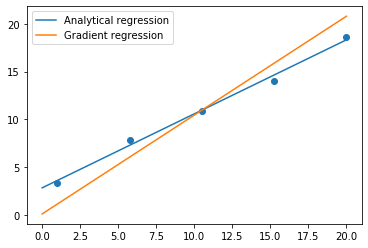

In [189]:
x = np.linspace(1, 20, 5)
x = x.reshape(x.shape[0],1)
y = np.sqrt(10*x+np.exp(0.25*x))
fig0, ax0 = plt.subplots(1)
ax0.scatter(x, y)

x = np.concatenate((np.ones((x.shape[0], 1), float), x), axis=1)

WlsAnal, errA = analyticalWeights(x, y, 0)
WlsGra, errG = gradientWeights(x, y, 0, 0.001, 100)
print(WlsAnal)
print(WlsGra)
print("Analytical error = {0}".format(errA))
print("Gradient error = {0}".format(errG))

xplt = np.array([0,20])
ax0.plot(xplt, WlsAnal[1]*xplt+WlsAnal[0], label="Analytical regression")
ax0.plot(xplt, WlsGra[1]*xplt+WlsGra[0], label="Gradient regression")
plt.legend()
plt.show()

Data imports

In [190]:
X_test = pd.read_csv(pathXtest, header=None)
Y = pd.read_csv(pathYtrain, header=None)
X = pd.read_csv(pathXtrain, header=None)
#X.insert(loc=0, column='b', value=1)
X.columns = ["x2", "x1", "b"]
Y.columns = ["y"]
#Xinv = X[["b","x1","x2"]]

In [191]:
X.head()

,x2,x1,b
0,0.657192,0.707838,1.0
1,0.841374,0.165887,1.0
2,0.261518,0.578101,1.0
3,0.293537,0.186930,1.0
4,0.784798,0.844337,1.0


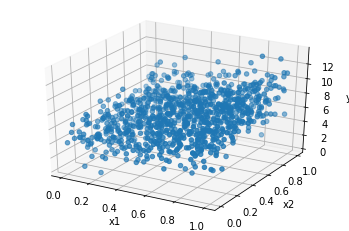

In [192]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax3 = fig.add_subplot(111, projection='3d')

ax3.scatter(X["x1"], X["x2"], Y)
#ax.plot_wireframe(X0, Y0, Z0)
#ax.plot_wireframe(x, y, Z)
#ax.plot_surface(X, Y, Z)
#ax.contour(X, Y, Z)

ax3.set_xlabel('x1')
ax3.set_ylabel('x2')
ax3.set_zlabel('y')

plt.show()

In [193]:
WlsAnal, erAnal = analyticalWeights(X.to_numpy(), Y.to_numpy(), 2)
WlsGra, erGra = gradientWeights(X.to_numpy(), Y.to_numpy(), 2, 0.001, 20)
print(WlsAnal)
print(WlsGra)
print("Analytical error = {0}".format(erAnal))
print("Gradient error = {0}".format(erGra))

[[1.97039193]
 [2.89106098]
 [4.00697261]]
[[2.1682942 ]
 [2.23202694]
 [4.25955962]]
Analytical error = 0.05522301865123693
Gradient error = 0.05557902598700395


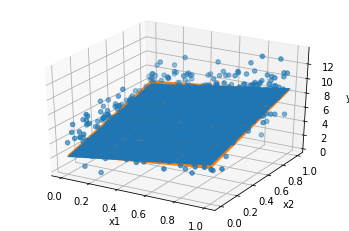

In [195]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax3 = fig.add_subplot(111, projection='3d')

ax3.scatter(X["x1"], X["x2"], Y)

x0 = np.linspace(0,1, 5)
y0 = np.linspace(0,1, 5)
x0, y0 = np.meshgrid(x0, y0)

P = WlsAnal
z0 = P[0]+P[1]*x0+P[2]*y0
ax3.plot_surface(x0, y0, z0, label="Analytical plane")
P = WlsGra
z0 = P[0]+P[1]*x0+P[2]*y0
ax3.plot_surface(x0, y0, z0, label="Analytical plane")


ax3.set_xlabel('x1')
ax3.set_ylabel('x2')
ax3.set_zlabel('y')
plt.show()

Ridge Regression: Part I

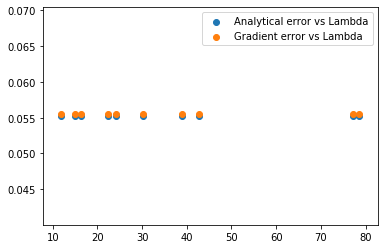

In [199]:
L = []
AnalyticalE = []
GradientE = []
N = 10
for i in range(N):
    l = 10**np.random.uniform(1, 2)
    Wrr0, erAnal = analyticalWeights(X.to_numpy(), Y.to_numpy(), 0)
    Wrr1, erGra = gradientWeights(X.to_numpy(), Y.to_numpy(), l, 0.001, 20)
    
    L.append(l)
    AnalyticalE.append(erAnal)
    GradientE.append(erGra)

figrr, axrr = plt.subplots(1)
axrr.scatter(L, AnalyticalE, label="Analytical error vs Lambda")
axrr.scatter(L, GradientE, label="Gradient error vs Lambda")
plt.legend()
plt.show()

Active Learning: Part II

In [74]:
def maxApost(lam, sig2, obs, y):
    nObs = obs.shape[0] #n
    nDimensions = obs.shape[1] #d
    autoCorr = np.dot(obs.T, obs) #XT.X
    crossCorr = np.dot(obs.T, y) #XT.y
    mean = np.dot(np.linalg.inv(
        lam*sig2*np.eye(nDimensions)
        + autoCorr),crossCorr) #mu
    cov = np.linalg.inv(lam*np.eye(nDimensions)
                        + autoCorr/sig2)
    return mean, cov

def uncertainty(x0, sigmaMat):
    return np.dot(x0.T,np.dot(sigmaMat,x0))

#We can take X and y but we optimise using
#the correlations
def priorToPosterior(lam, sig2, 
                     autoCorr, crossCorr,
                     newX, newY):
    #nObs = obs.shape[0] #n
    nDimensions = autoCorr.shape[1] #d
    newAutoCorr = np.dot(newX.T, newX) + autoCorr #XT.X
    newCrossCorr = newX*newY + crossCorr #XT.y
    newMean = np.dot(np.linalg.inv(
        lam*sig2*np.eye(nDimensions)
        + newAutoCorr),newCrossCorr) #mu
    newCov = np.linalg.inv(lam*np.eye(nDimensions)
                        + newAutoCorr/sig2)
    return newMean, newCov, newAutoCorr, newCrossCorr


In [201]:
lam = 2
sigma2 = 2
obs = X.to_numpy()
y = Y.to_numpy()
mean, cov = maxApost(lam, sigma2, obs, y)


In [97]:
autoCorr = np.dot(obs.T, obs)
crossCorr = np.dot(obs.T, y)
newX0 = np.array([0.56,0.38,1]).reshape(3,1)
newY0 = 0
unc = uncertainty(newX0, cov)
mean, cov, autoCorr, crossCorr = priorToPosterior(
    lam, sigma2, autoCorr, crossCorr,
    newX0, newY0)

In [99]:
print(unc)

[[0.00251614]]


In [151]:
#X_test["var0"]=X_test.apply(uncertainty, sigmaMat=cov, axis=1)
X_test.head()


,0,1,2
0,0.567710,0.384913,1.0
1,0.394372,0.058187,1.0
2,0.198740,0.999589,1.0
3,0.905108,0.418559,1.0
4,0.003828,0.348261,1.0


22
0     0.002530
1     0.007387
2     0.009726
3     0.005939
4     0.008519
        ...   
95    0.005787
96    0.008810
97    0.003752
98    0.010231
99    0.009851
Length: 100, dtype: float64
88


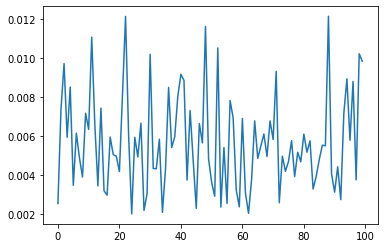

In [204]:
ser=X_test.apply(uncertainty, 
               sigmaMat=cov, 
               axis=1)
print(ser)
plt.plot(ser)
Q=ser.idxmax()
print(Q)

In [208]:
lam = 2
sigma2 = 3
obs = X.to_numpy()
y = Y.to_numpy()

autoCorr = np.dot(obs.T, obs)
crossCorr = np.dot(obs.T, y)

#Set of points to choose from
Dx = X_test
#Number of points to be chosen
Nx = 1

#0. Maximum a posteriori (with X and y)
mean, cov = maxApost(lam, sigma2, obs, y)

for q in range(Nx):
#1. Find the best covariate 
#With highest uncertainty
#According to the predictive distribution
Q = Dx.apply(uncertainty, 
               sigmaMat=cov, 
               axis=1).idxmax()
bestX0 = np.array([Dx.iloc[Q,:]])

#2. Update the posterior
#Prior -> Posterior
#Estimate of the corresponding label
#mean = W Max a posteriori
newY0 = np.dot(bestX0, mean)
#New mean=f(y0), new cov independent from y0!
mean, cov, autoCorr, crossCorr = priorToPosterior(
    lam, sigma2, autoCorr, crossCorr,
    bestX0, newY0)
#Take Best x0 off from the set D
Dx.drop([Q], axis=0)
print(Q)
 

IndentationError: expected an indented block (<ipython-input-208-72c531673a88>, line 21)

In [209]:
lam = 2
sigma2 = 3
obs = X.to_numpy()
y = Y.to_numpy()
#Set of points to choose from
Dx = X_test
#Number of points to be chosen
Nx = 1

#0. Maximum a posteriori (with X and y)
notNeeded_wMAP, cov = maxApost(lam, sigma2, obs, y)

#for q in range(Nx):
#1. Find the best covariate 
#With highest uncertainty
#According to the predictive distribution
Q = Dx.apply(uncertainty, 
               sigmaMat=cov, 
               axis=1).idxmax()
bestX0 = np.array([Dx.iloc[Q,:]])
#Take Best x0 off from the set D
Dx.drop([Q], axis=0)
print(Q)
 
#2. Update the posterior covariance
#Prior -> Posterior
cov = np.linalg.inv(np.linalg.inv(cov)
             +np.dot(bestX0.T,bestX0)/sigma2)


88
